<a href="https://colab.research.google.com/github/abuy69/abuy69/blob/main/ab_test_landing_page.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**AB Test Analysis**
The goal of this analysis is to determine wether there is  signficance between old page and brand new page. The data for this analysis will be genertaed with numpy library. The hypothesis as following:


*(H0): There is no difference in conversion rates between the
old page and new page groups.

*(H1): There is a difference in conversion rates between the old page and new page groups.




First, we should import neccessary library, pandas, scipy and numpy.
Pandas is needed to imoort the data frame, scipy to perfrom the t-test and numpy to generate the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# For reproducibility
np.random.seed(88)
from scipy import stats

The data generated will have column as following: id (int), timestamp (time), group (str), landing page (str), and converted (bool).
It also containts  80.000 rows with 7.500 unique id to match real world data.

In [3]:


# Define parameters
num_rows = 80000
num_unique_users = 7500

# Generate unique user IDs
unique_user_ids = [f"AB{str(i).zfill(4)}" for i in range(1, num_unique_users + 1)]

# Simulate multiple clicks for each user
user_ids = np.random.choice(unique_user_ids, size=num_rows, replace=True)

# Generate timestamps (random dates within a range)
timestamps = pd.date_range(start='2024-01-01', periods=num_rows, freq='T')

# Generate groups ('control' or 'treatment')
groups = np.random.choice(['control', 'treatment'], size=num_rows)

# Generate landing pages ('old' or 'new')
landing_pages = np.random.choice(['old', 'new'], size=num_rows)

# Generate conversion status boolean data type(0 or 1)
converted = np.random.choice([0, 1], size=num_rows)


Shows the first 5 rows of the table

In [4]:
# Create DataFrame
ab_test = pd.DataFrame({
    'user_id': user_ids,
    'timestamp': timestamps,
    'group': groups,
    'landing_page': landing_pages,
    'converted': converted
})

# Display the first few rows
print(ab_test.head())


  user_id           timestamp      group landing_page  converted
0  AB2009 2024-01-01 00:00:00  treatment          new          1
1  AB6433 2024-01-01 00:01:00    control          new          1
2  AB4048 2024-01-01 00:02:00  treatment          new          1
3  AB2482 2024-01-01 00:03:00  treatment          old          1
4  AB0363 2024-01-01 00:04:00    control          old          1


In [5]:
ab_test.to_csv('ab_test_large_sample.csv', index=False) #saving the data into csv file as backup


**Descriptive Analysis**:
<br>There are treatment 40165 rows and control   39835 rows. With means 49.5%  and 49.7% respectively very close margin. With this close margin it seems there is no signifincant difference between the pages. However let's proceed to the test to confirm it!


In [6]:
print(ab_test['group'].value_counts())
print(ab_test.groupby('group')['converted'].mean())


group
treatment    40165
control      39835
Name: count, dtype: int64
group
control      0.495946
treatment    0.497473
Name: converted, dtype: float64


Let's see how it looks like in bar graph.

<ipython-input-7-3ccb9d5b8729>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='group', y='converted', data=ab_test, ci=False, palette={'control': 'green', 'treatment': 'blue'})
<ipython-input-7-3ccb9d5b8729>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group', y='converted', data=ab_test, ci=False, palette={'control': 'green', 'treatment': 'blue'})


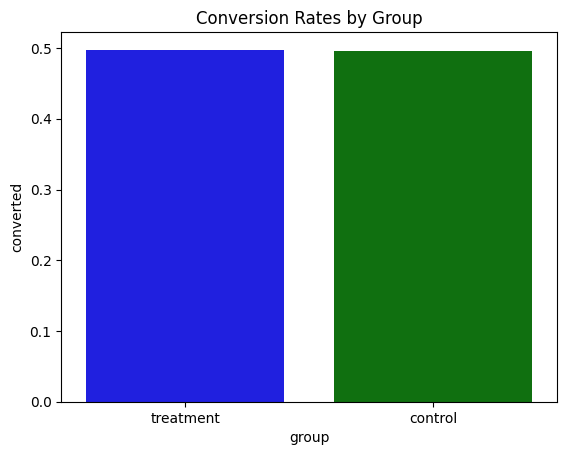

In [7]:
sns.barplot(x='group', y='converted', data=ab_test, ci=False, palette={'control': 'green', 'treatment': 'blue'})

plt.title('Conversion Rates by Group')
plt.show()

To find whether there is significance differnce between control vs treatment group, we should perform t-statistic and find the p-value.

In [8]:
# Before perfrming the t-test, we need to split the data into control and treatment groups
control = ab_test[ab_test['group'] == 'control']['converted']
treatment = ab_test[ab_test['group'] == 'treatment']['converted']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(control, treatment)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')


T-statistic: -0.4319434093851819
P-value: 0.6657837079000177


## **Conclusion**
The result of t-test shows that p-value is 0.66 which is above significance level of 5% (confidence level of 95%). Therefore we failed to reject H0 which means there is no significance differnce between new page and old page in term of conversion rate.